# Pet Recommendation System

In this kernel we'll be building a Pet Recommendation System using https://github.com/sahityashetty19/pet-recommender-system/tree/master/data Dataset. 

The user is able to input the name of a dog breed (as a string), for which the system will have to return a set of the breeds that are most similar to this breed based on a specific attribute (excluding itself). To aid this the dataset will contain a set of dictionary dogs, mapping to dog breeds to various adgectives describing that breed's typical attributes such as its height, weight, size. In this context, two breeds are more similar the more attributes they share.

In [1]:
# import required libraries
import pandas as pd
import numpy as np 
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objs as go

%matplotlib inline
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import cluster

from pca import pca as pca_2
from sklearn import cluster
from numpy import dot
from numpy.linalg import norm
import numpy as np
from sklearn import preprocessing
from pandas import DataFrame

# Data Preparation
### Cleaning the data 
Part I: Identify and correct mistakes
- Messy datasets
- Identify columns that contain a single value
- Delete columns that contain a single value
- Consider columns that have very few values
- Remove columns that have a low variance
- Identify rows that contain duplicate data
- Delete rows that contain duplicate data

In [2]:
# load the dataset
dataset = pd.read_csv('dogs.csv', na_values='?', index_col='|')
print(dataset.shape)

(199, 40)


In [3]:
header = ['url','shedding','overall_health','groom','weight_gain','drooling','general_health','size','wander','intelligence',
          'overall_trainability','prey_drive','mouthiness','bark','train','playful','energy','exercise','overall_exerciseneeds',
          'exercise_intensity','cold_weather','novice_owners','sensitivity','overall_adaptability','hot_weather','alone',
          'apartment','family_affection','friendly_strangers','overall_friendly','kid_friendly','dog_friendly','breed_group',
          'max_lifespan','min_lifespan','max_weight','min_weight','min_height','max_height','shoulder_height']
dataset.index.names = ['breed']
dataset.columns = header
dataset.head(5)

url  shedding  \
breed                                                                        
Azawakh                    http://dogtime.com/dog-breeds/azawakh         3   
Fox Terrier            http://dogtime.com/dog-breeds/fox-terrier         4   
Norwegian Buhund  http://dogtime.com/dog-breeds/norwegian-buhund         2   
Clumber Spaniel    http://dogtime.com/dog-breeds/clumber-spaniel         2   
Rottweiler              http://dogtime.com/dog-breeds/rottweiler         3   

                  overall_health  groom  weight_gain  drooling  \
breed                                                            
Azawakh                        4      5          3.0         5   
Fox Terrier                    3      2          2.0         3   
Norwegian Buhund               3      2          3.0         5   
Clumber Spaniel                3      2          4.0         2   
Rottweiler                     4      5          5.0         2   

                  general_health  size  wander  intelligence  ...  \
breed                                                         ...   
Azawakh                      3.0   3.0     2.0             3  ...   
Fox Terrier                  4.0   2.0     3.0             4  ...   
Norwegian Buhund             3.0   3.0     4.0             4  ...   
Clumber Spaniel              2.0   4.0     3.0             4  ...   
Rottweiler                   1.0   5.0     2.0             4  ...   

                  kid_friendly  dog_friendly    breed_group  max_lifespan  \
breed                                                                       
Azawakh                      3             3     Hound Dogs            15   
Fox Terrier                  4             2   Terrier Dogs            15   
Norwegian Buhund             3             3   Herding Dogs            15   
Clumber Spaniel              3             4  Sporting Dogs            12   
Rottweiler                   4             3   Working Dogs            11   

                  min_lifespan  max_weight  min_weight    min_height  \
breed                                                                  
Azawakh                     12        55.0          33        1 foot   
Fox Terrier                 10        19.0          15  Up to 1 foot   
Norwegian Buhund            12        40.0          26        1 foot   
Clumber Spaniel             12        85.0          55        1 foot   
Rottweiler                   8       130.0          85        1 foot   

                                      max_height  \
breed                                              
Azawakh                      11 inches to 2 feet   
Fox Terrier        3 inches tall at the shoulder   
Norwegian Buhund              4 inches to 1 foot   
Clumber Spaniel               5 inches to 1 foot   
Rottweiler                   10 inches to 2 feet   

                                 shoulder_height  
breed                                             
Azawakh            5 inches tall at the shoulder  
Fox Terrier                                  NaN  
Norwegian Buhund   6 inches tall at the shoulder  
Clumber Spaniel    8 inches tall at the shoulder  
Rottweiler         3 inches tall at the shoulder  

[5 rows x 40 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, Azawakh to Leonberger
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    199 non-null    object 
 1   shedding               199 non-null    int64  
 2   overall_health         199 non-null    int64  
 3   groom                  199 non-null    int64  
 4   weight_gain            198 non-null    float64
 5   drooling               199 non-null    int64  
 6   general_health         198 non-null    float64
 7   size                   198 non-null    float64
 8   wander                 198 non-null    float64
 9   intelligence           199 non-null    int64  
 10  overall_trainability   199 non-null    int64  
 11  prey_drive             194 non-null    float64
 12  mouthiness             198 non-null    float64
 13  bark                   198 non-null    float64
 14  train                  198 non-null    float64
 15

In [5]:
dataset['min_lifespan']= pd.to_numeric(dataset['min_lifespan'],errors='coerce')
dataset['min_weight']= pd.to_numeric(dataset['min_weight'],errors='coerce')

# drop overall_features - does not define a feature
dataset = dataset.drop(['overall_health','overall_trainability','overall_exerciseneeds','overall_adaptability',
                       'overall_friendly','url','min_height','max_height','shoulder_height'], axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, Azawakh to Leonberger
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   shedding            199 non-null    int64  
 1   groom               199 non-null    int64  
 2   weight_gain         198 non-null    float64
 3   drooling            199 non-null    int64  
 4   general_health      198 non-null    float64
 5   size                198 non-null    float64
 6   wander              198 non-null    float64
 7   intelligence        199 non-null    int64  
 8   prey_drive          194 non-null    float64
 9   mouthiness          198 non-null    float64
 10  bark                198 non-null    float64
 11  train               198 non-null    float64
 12  playful             198 non-null    float64
 13  energy              199 non-null    int64  
 14  exercise            199 non-null    int64  
 15  exercise_intensity  198 non-null    float64
 16  

In [6]:
# locate rows of duplicate data
dups = dataset.duplicated().sum()
print('The amount of duplicated data is:',dups)

The amount of duplicated data is: 0


Part II: Mark and remove missing data
- Mark missing values
- Missing values cause problems
- Remove rows with missing values

In [7]:
columnStatistics = pd.DataFrame(dataset.max(axis=0))
columnStatistics.columns = ['MaxValues']

columnStatistics['MinValues'] = dataset.min(axis=0)
uniqueCounts = pd.DataFrame(columnStatistics.index)
uniqueCounts.set_index(0, inplace=True)
uniqueCounts['UniqueValues'] = np.nan
for col in dataset:
    uniqueCounts.loc[col]['UniqueValues'] = dataset[col].nunique()
columnStatistics['UniqueValues'] = uniqueCounts['UniqueValues']

columnStatistics
# likert scale from a scale of 1 to 5, no zero min val

MaxValues       MinValues  UniqueValues
shedding                       5               1           5.0
groom                          5               1           5.0
weight_gain                    5               1           5.0
drooling                       5               1           5.0
general_health                 5               1           5.0
size                           5               1           5.0
wander                         5               1           5.0
intelligence                   5               2           4.0
prey_drive                     5               1           5.0
mouthiness                     5               1           5.0
bark                           5               1           5.0
train                          5               1           5.0
playful                        5               1           5.0
energy                         5               2           4.0
exercise                       5               2           4.0
exercise_intensity             5               1           5.0
cold_weather                   5               1           5.0
novice_owners                  5               1           5.0
sensitivity                    5               2           4.0
hot_weather                    5               1           5.0
alone                          5               1           5.0
apartment                      5               1           5.0
family_affection               5               2           4.0
friendly_strangers             5               1           5.0
kid_friendly                   5               1           5.0
dog_friendly                   5               1           5.0
breed_group         Working Dogs  Companion Dogs           8.0
max_lifespan                  20               8          12.0
min_lifespan                  15               6          10.0
max_weight                   220               6          55.0
min_weight                   130               3          41.0

In [8]:
for i in dataset.columns:
    num_missing = (dataset[[i]].isnull()).sum()
    perc = num_missing/dataset.shape[0]*100
    print('> %s, Missing: %d (%.1f%%)' % (i,num_missing,perc))

> shedding, Missing: 0 (0.0%)
> groom, Missing: 0 (0.0%)
> weight_gain, Missing: 1 (0.5%)
> drooling, Missing: 0 (0.0%)
> general_health, Missing: 1 (0.5%)
> size, Missing: 1 (0.5%)
> wander, Missing: 1 (0.5%)
> intelligence, Missing: 0 (0.0%)
> prey_drive, Missing: 5 (2.5%)
> mouthiness, Missing: 1 (0.5%)
> bark, Missing: 1 (0.5%)
> train, Missing: 1 (0.5%)
> playful, Missing: 1 (0.5%)
> energy, Missing: 0 (0.0%)
> exercise, Missing: 0 (0.0%)
> exercise_intensity, Missing: 1 (0.5%)
> cold_weather, Missing: 0 (0.0%)
> novice_owners, Missing: 0 (0.0%)
> sensitivity, Missing: 0 (0.0%)
> hot_weather, Missing: 0 (0.0%)
> alone, Missing: 0 (0.0%)
> apartment, Missing: 0 (0.0%)
> family_affection, Missing: 0 (0.0%)
> friendly_strangers, Missing: 0 (0.0%)
> kid_friendly, Missing: 0 (0.0%)
> dog_friendly, Missing: 0 (0.0%)
> breed_group, Missing: 0 (0.0%)
> max_lifespan, Missing: 0 (0.0%)
> min_lifespan, Missing: 4 (2.0%)
> max_weight, Missing: 6 (3.0%)
> min_weight, Missing: 16 (8.0%)


In [9]:
# inpute missing values
bool_series = pd.isnull(dataset["weight_gain"])
dataset[bool_series]

shedding  groom  weight_gain  drooling  general_health  \
breed                                                                      
Korean Jindo Dog         3      4          NaN         1             NaN   

                  size  wander  intelligence  prey_drive  mouthiness  ...  \
breed                                                                 ...   
Korean Jindo Dog   NaN     NaN             5         5.0         NaN  ...   

                  apartment  family_affection  friendly_strangers  \
breed                                                               
Korean Jindo Dog          4                 4                   4   

                  kid_friendly  dog_friendly    breed_group  max_lifespan  \
breed                                                                       
Korean Jindo Dog             4             3  Sporting Dogs            15   

                  min_lifespan  max_weight  min_weight  
breed                                                   
Korean Jindo Dog          12.0        60.0        35.0  

[1 rows x 31 columns]

<b>From the dataframe above, 9/31 attributes are missing from this specific breed. Hence, drop the row.</b>

In [10]:
dataset = dataset.drop(labels='Korean Jindo Dog')
dataset.loc[dataset.index == 'Korean Jindo Dog']

index_list = dataset.index.tolist()

<b>Next, we visualize the prey_drive attribute to determine how to handle the missing values</b>

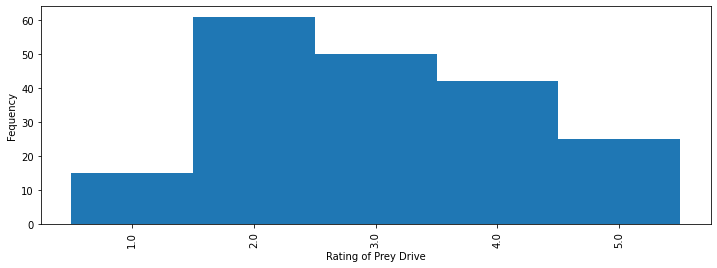

The median of prey_drive rating is: 3.0
The mean of prey_drive rating is: 3.0


In [11]:
prey_drive = dataset['prey_drive'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 4))
ax = prey_drive.plot(kind='bar',width=1.0)
ax.set(xlabel = "Rating of Prey Drive",
       ylabel = "Fequency")
plt.show()
print('The median of prey_drive rating is:',dataset["prey_drive"].median())
print('The mean of prey_drive rating is:',round(dataset["prey_drive"].mean(),0))

<b>Since there is no difference between the mean and median: replace with either</b>

In [12]:
# Replace the missing values with mean/median
# Since it is an ordinal data, a median is more suitable
dataset["prey_drive"].fillna(dataset['prey_drive'].mean(), inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, Azawakh to Leonberger
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   shedding            198 non-null    int64  
 1   groom               198 non-null    int64  
 2   weight_gain         198 non-null    float64
 3   drooling            198 non-null    int64  
 4   general_health      198 non-null    float64
 5   size                198 non-null    float64
 6   wander              198 non-null    float64
 7   intelligence        198 non-null    int64  
 8   prey_drive          198 non-null    float64
 9   mouthiness          198 non-null    float64
 10  bark                198 non-null    float64
 11  train               198 non-null    float64
 12  playful             198 non-null    float64
 13  energy              198 non-null    int64  
 14  exercise            198 non-null    int64  
 15  exercise_intensity  198 non-null    float64
 16  

In [13]:
# format fields
dataset = dataset.astype({header[4]: 'int64', header[6]: 'int64', header[7]: 'int64', header[8]: 'int64',
                          header[11]: 'int64', header[12]: 'int64', header[13]: 'int64', header[14]: 'int64',
                          header[15]: 'int64', header[19]: 'int64', header[33]: 'int64', header[34]: float,
                          header[36]: float})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, Azawakh to Leonberger
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   shedding            198 non-null    int64  
 1   groom               198 non-null    int64  
 2   weight_gain         198 non-null    int64  
 3   drooling            198 non-null    int64  
 4   general_health      198 non-null    int64  
 5   size                198 non-null    int64  
 6   wander              198 non-null    int64  
 7   intelligence        198 non-null    int64  
 8   prey_drive          198 non-null    int64  
 9   mouthiness          198 non-null    int64  
 10  bark                198 non-null    int64  
 11  train               198 non-null    int64  
 12  playful             198 non-null    int64  
 13  energy              198 non-null    int64  
 14  exercise            198 non-null    int64  
 15  exercise_intensity  198 non-null    int64  
 16  

<b>Investigate weight and lifespan</b>

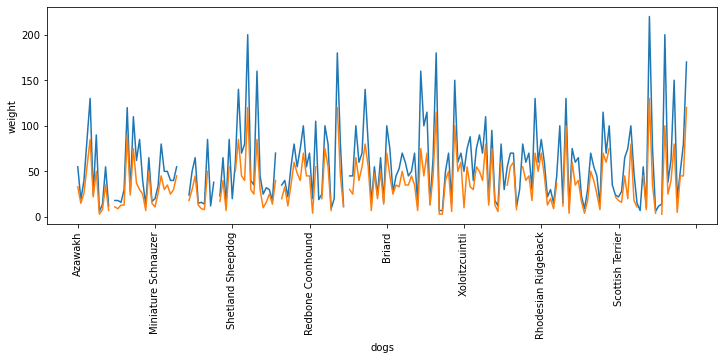

In [14]:
weight_max = dataset['max_weight']
weight_min = dataset['min_weight']
weight_max.plot.line(figsize=(12,4))
weight_min.plot.line()
plt.ylabel("weight")
plt.xlabel("dogs")
plt.xticks(rotation=90)
plt.show()

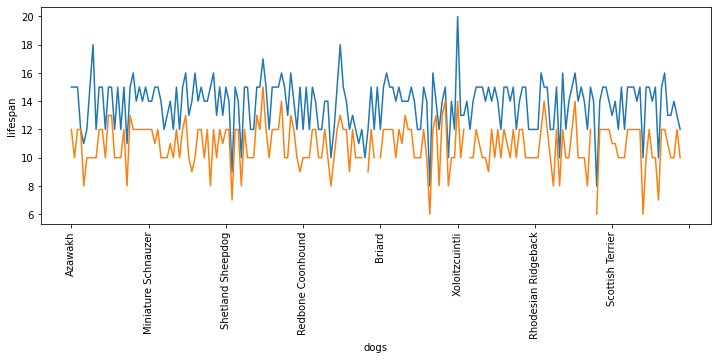

In [15]:
lifespan_max = dataset['max_lifespan']
lifespan_min = dataset['min_lifespan']
lifespan_max.plot.line(figsize=(12,4))
lifespan_min.plot.line()
plt.ylabel("lifespan")
plt.xlabel("dogs")
plt.xticks(rotation=90)
plt.show()

In [16]:
# no interesting analysis can be made from the maximum and minimum besides the range
# if (max-min)/2 != mean of the weight
dataset = dataset.drop(['max_weight','min_weight'], axis = 1)
dataset = dataset.drop(['max_lifespan','min_lifespan'], axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, Azawakh to Leonberger
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   shedding            198 non-null    int64 
 1   groom               198 non-null    int64 
 2   weight_gain         198 non-null    int64 
 3   drooling            198 non-null    int64 
 4   general_health      198 non-null    int64 
 5   size                198 non-null    int64 
 6   wander              198 non-null    int64 
 7   intelligence        198 non-null    int64 
 8   prey_drive          198 non-null    int64 
 9   mouthiness          198 non-null    int64 
 10  bark                198 non-null    int64 
 11  train               198 non-null    int64 
 12  playful             198 non-null    int64 
 13  energy              198 non-null    int64 
 14  exercise            198 non-null    int64 
 15  exercise_intensity  198 non-null    int64 
 16  cold_weather      

### Feature Selection (Correlation)
Part I: Identify and reduce the features in the dataset that are highly correlated.<br>

shedding  groom  weight_gain  drooling  \
breed                                                              
Azawakh                          3      5            3         5   
Fox Terrier                      4      2            2         3   
Norwegian Buhund                 2      2            3         5   
Clumber Spaniel                  2      2            4         2   
Rottweiler                       3      5            5         2   
...                            ...    ...          ...       ...   
Anatolian Shepherd Dog           2      4            3         3   
Maltipoo                         4      2            2         5   
Ibizan Hound                     5      5            1         5   
Treeing Walker Coonhound         3      5            3         3   
Leonberger                       1      4            4         3   

                          general_health  size  wander  intelligence  \
breed                                                                  
Azawakh                                3     3       2             3   
Fox Terrier                            4     2       3             4   
Norwegian Buhund                       3     3       4             4   
Clumber Spaniel                        2     4       3             4   
Rottweiler                             1     5       2             4   
...                                  ...   ...     ...           ...   
Anatolian Shepherd Dog                 3     5       4             4   
Maltipoo                               3     2       2             3   
Ibizan Hound                           4     3       4             3   
Treeing Walker Coonhound               3     4       5             4   
Leonberger                             1     5       2             3   

                          prey_drive  mouthiness  ...  novice_owners  \
breed                                             ...                  
Azawakh                            4           4  ...              2   
Fox Terrier                        2           2  ...              3   
Norwegian Buhund                   2           2  ...              3   
Clumber Spaniel                    3           2  ...              4   
Rottweiler                         2           2  ...              2   
...                              ...         ...  ...            ...   
Anatolian Shepherd Dog             2           2  ...              2   
Maltipoo                           4           3  ...              5   
Ibizan Hound                       5           3  ...              3   
Treeing Walker Coonhound           4           3  ...              2   
Leonberger                         4           3  ...              3   

                          sensitivity  hot_weather  alone  apartment  \
breed                                                                  
Azawakh                             3            4      3          2   
Fox Terrier                         3            4      3          3   
Norwegian Buhund                    3            2      4          2   
Clumber Spaniel                     3            3      3          3   
Rottweiler                          3            3      3          2   
...                               ...          ...    ...        ...   
Anatolian Shepherd Dog              4            3      3          1   
Maltipoo                            3            3      3          5   
Ibizan Hound                        3            4      2          3   
Treeing Walker Coonhound            3            3      2          1   
Leonberger                          4            3      2          1   

                          family_affection  friendly_strangers  kid_friendly  \
breed                                                                          
Azawakh                                  3                   2             3   
Fox Terrier                              4                   3             4   
Norwegian 

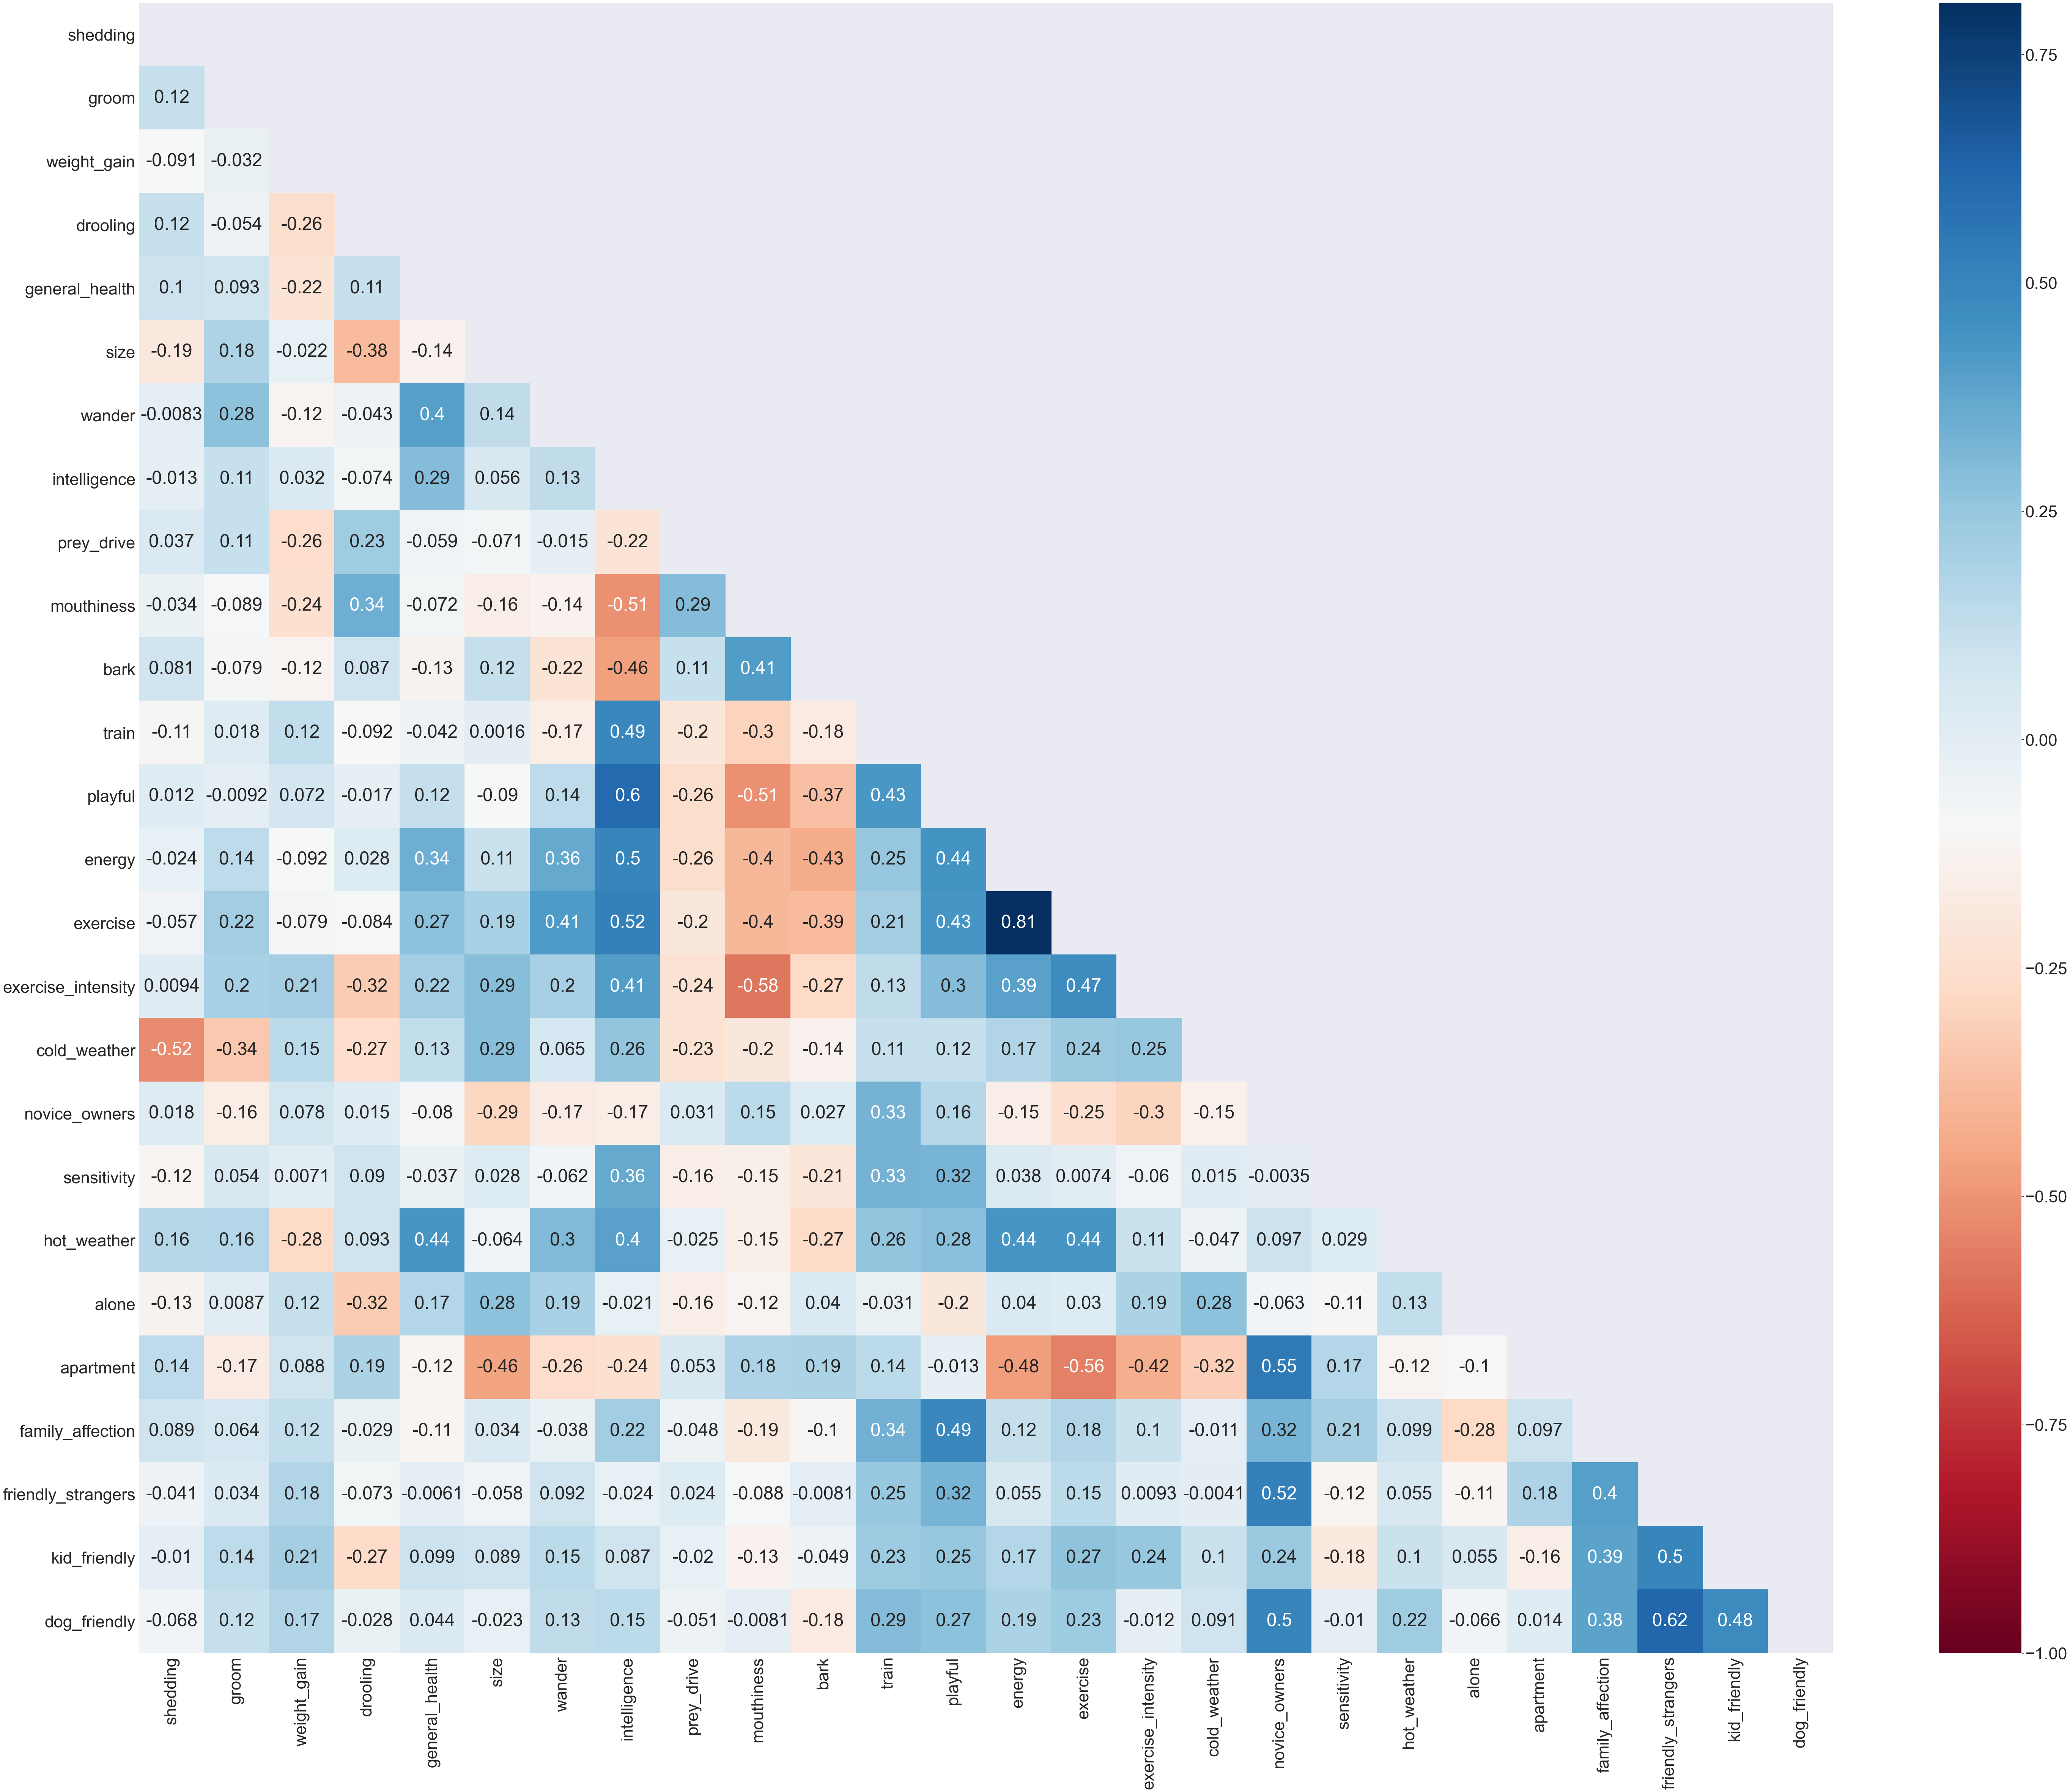

In [17]:
corr = dataset.corr()
sns.set(font_scale=4)
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(100, 80))
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, mask=mask)
sns.set(font_scale=1)
dataset

<b>Observations:</b>
- Exercise and enery are highly positively correlated and should not be paired together in the same model with a value of 0.81.
- Next, friendly towards strangers and dog friendly & playful and intelligence have a weak positive correlation score of 0.6  
To verify the correlation, a bubble chart used to visualize the data. A bubble chart is a scatter plot in which a third dimension of the data is shown through the size of markers.

Text(0, 0.5, 'Energy Level')

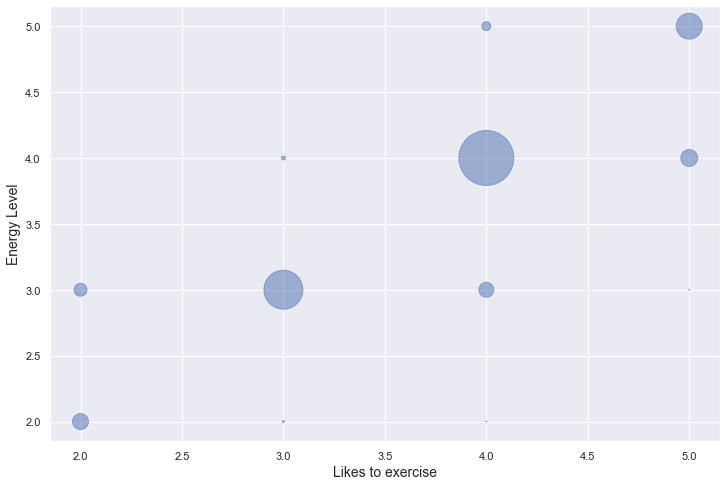

In [18]:
bubble_df = pd.DataFrame({'count' : dataset.groupby(['energy', 'exercise']).size()}).reset_index()
plt.figure(figsize=(12, 8))
plt.scatter(x=bubble_df['exercise'].values, y=bubble_df['energy'].values,
                  alpha=0.5,
                  s = bubble_df['count'].values **2)
plt.xlabel('Likes to exercise', size=14)
plt.ylabel('Energy Level', size=14)

In [19]:
dataset = dataset.drop(columns='exercise')
dataset = dataset.drop(columns='cold_weather')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, Azawakh to Leonberger
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   shedding            198 non-null    int64 
 1   groom               198 non-null    int64 
 2   weight_gain         198 non-null    int64 
 3   drooling            198 non-null    int64 
 4   general_health      198 non-null    int64 
 5   size                198 non-null    int64 
 6   wander              198 non-null    int64 
 7   intelligence        198 non-null    int64 
 8   prey_drive          198 non-null    int64 
 9   mouthiness          198 non-null    int64 
 10  bark                198 non-null    int64 
 11  train               198 non-null    int64 
 12  playful             198 non-null    int64 
 13  energy              198 non-null    int64 
 14  exercise_intensity  198 non-null    int64 
 15  novice_owners       198 non-null    int64 
 16  sensitivity       

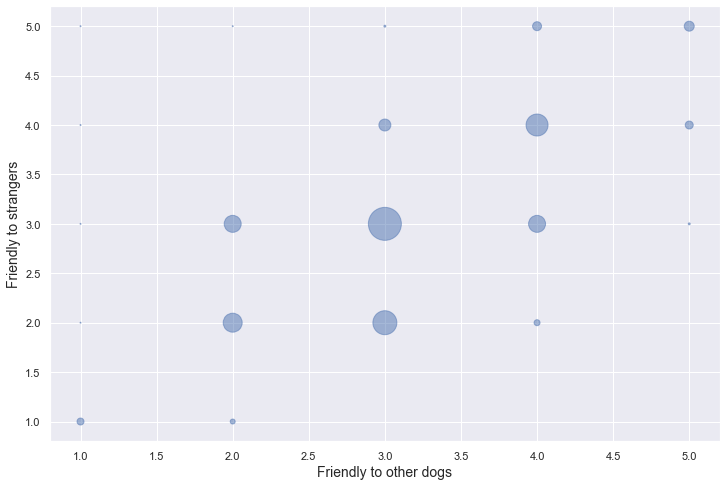

In [20]:
bubble_df = pd.DataFrame({'count' : dataset.groupby(['dog_friendly', 'friendly_strangers']).size()}).reset_index()
plt.figure(figsize=(12, 8))
plt.scatter(x=bubble_df['dog_friendly'].values, y=bubble_df['friendly_strangers'].values,
                  alpha=0.5,
                  s = bubble_df['count'].values **2)
plt.xlabel('Friendly to other dogs', size=14)
plt.ylabel('Friendly to strangers', size=14)
dataset = dataset.drop(columns='friendly_strangers')

Text(0, 0.5, 'Intelligent')

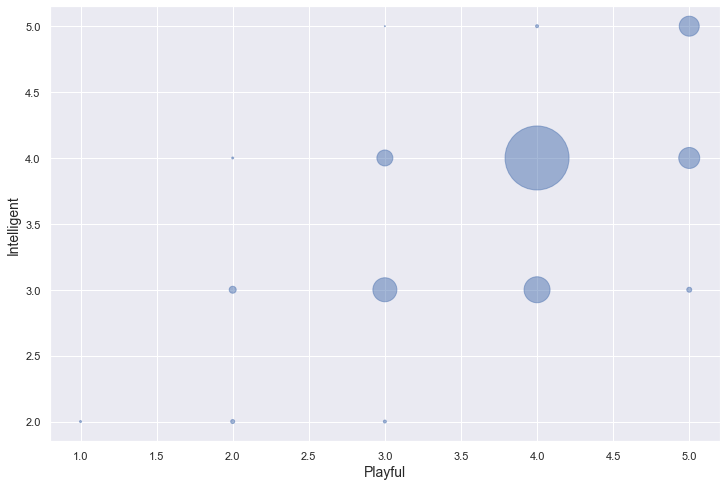

In [21]:
bubble_df = pd.DataFrame({'count' : dataset.groupby(['playful', 'intelligence']).size()}).reset_index()
plt.figure(figsize=(12, 8))
plt.scatter(x=bubble_df['playful'].values, y=bubble_df['intelligence'].values,
                  alpha=0.5,
                  s = bubble_df['count'].values **2)
plt.xlabel('Playful', size=14)
plt.ylabel('Intelligent', size=14)

Text(0, 0.5, 'Intelligent')

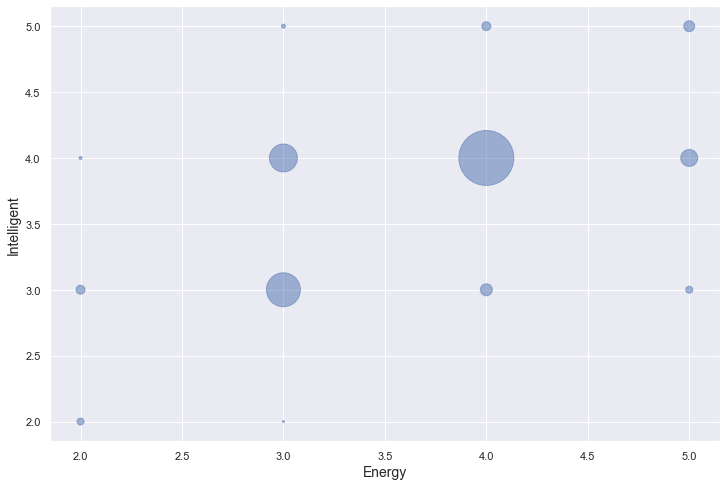

In [22]:
bubble_df = pd.DataFrame({'count' : dataset.groupby(['energy', 'intelligence']).size()}).reset_index()
x = np.array(bubble_df['energy'].values)
y = np.array(bubble_df['intelligence'].values)
plt.figure(figsize=(12, 8))

plt.scatter(x, y, alpha=0.5,s = bubble_df['count'].values **2)
plt.xlabel('Energy', size=14)
plt.ylabel('Intelligent', size=14)

### Feature Selection (Dimensionality Reduction - PCA)

In [23]:
dataset = dataset.drop(['breed_group'], axis = 1)
x = StandardScaler().fit_transform(dataset)
# standardization 
x = pd.DataFrame(x, columns =dataset.columns.values)
print(x.shape) 
x.round(2).head()

pca_fitting_dataset = x.copy()
pca_fitting_dataset

(198, 23)


shedding     groom  weight_gain  drooling  general_health      size  \
0   -0.072519  1.367292    -0.306707  1.248458        0.108523  0.011130   
1    0.772117 -0.821849    -1.452518 -0.517218        1.085233 -0.723429   
2   -0.917155 -0.821849    -0.306707  1.248458        0.108523  0.011130   
3   -0.917155 -0.821849     0.839104 -1.400057       -0.868186  0.745688   
4   -0.072519  1.367292     1.984915 -1.400057       -1.844896  1.480247   
..        ...       ...          ...       ...             ...       ...   
193 -0.917155  0.637578    -0.306707 -0.517218        0.108523  1.480247   
194  0.772117 -0.821849    -1.452518  1.248458        0.108523 -0.723429   
195  1.616752  1.367292    -2.598329  1.248458        1.085233  0.011130   
196 -0.072519  1.367292    -0.306707 -0.517218        0.108523  0.745688   
197 -1.761791  0.637578     0.839104 -0.517218       -1.844896  1.480247   

       wander  intelligence  prey_drive  mouthiness  ...    energy  \
0   -1.028776     -0.979427    0.863296    1.647556  ... -0.728383   
1   -0.210713      0.386253   -0.872061   -0.527218  ...  0.407206   
2    0.607350      0.386253   -0.872061   -0.527218  ...  0.407206   
3   -0.210713      0.386253   -0.004382   -0.527218  ... -0.728383   
4   -1.028776      0.386253   -0.872061   -0.527218  ... -0.728383   
..        ...           ...         ...         ...  ...       ...   
193  0.607350      0.386253   -0.872061   -0.527218  ... -0.728383   
194 -1.028776     -0.979427    0.863296    0.560169  ... -0.728383   
195  0.607350     -0.979427    1.730975    0.560169  ... -0.728383   
196  1.425413      0.386253    0.863296    0.560169  ...  0.407206   
197 -1.028776     -0.979427    0.863296    0.560169  ...  0.407206   

     exercise_intensity  novice_owners  sensitivity  hot_weather     alone  \
0             -0.439097      -1.090119    -0.439943     0.934353  0.266395   
1              0.634251      -0.175528    -0.439943     0.934353  0.266395   
2              0.634251      -0.175528    -0.439943    -1.308094  1.342848   
3             -0.439097       0.739064    -0.439943    -0.186871  0.266395   
4              0.634251      -1.090119    -0.439943    -0.186871  0.266395   
..                  ...            ...          ...          ...       ...   
193           -0.439097      -1.090119     0.786940    -0.186871  0.266395   
194           -0.439097       1.653655    -0.439943    -0.186871  0.266395   
195           -0.439097      -0.175528    -0.439943     0.934353 -0.810058   
196            0.634251      -1.090119    -0.439943    -0.186871 -0.810058   
197            0.634251      -0.175528     0.786940    -0.186871 -0.810058   

     apartment  family_affection  kid_friendly  dog_friendly  
0    -0.780122         -1.774095     -0.498170     -0.145248  
1    -0.026638         -0.463383      0.518713     -1.103886  
2    -0.780122         -0.463383     -0.498170     -0.145248  
3    -0.026638         -0.463383     -0.498170      0.813390  
4    -0.780122         -0.463383      0.518713     -0.145248  
..         ...               ...           ...           ...  
193  -1.533606         -1.774095     -1.515053     -1.103886  
194   1.480329          0.847329      0.518713     -0.145248  
195  -0.026638          0.847329      0.518713     -0.145248  
196  -1.533606         -0.463383      0.518713      0.813390  
197  -1.533606          0.847329      0.518713     -0.145248  

[198 rows x 23 columns]

In [24]:
print(len(dataset.columns))

23


In [25]:
pca = PCA(n_components= len(dataset.columns)) #covariance matrix
pca.fit(x)
print(x.shape)

(198, 23)


The first column is the first PC and so on.

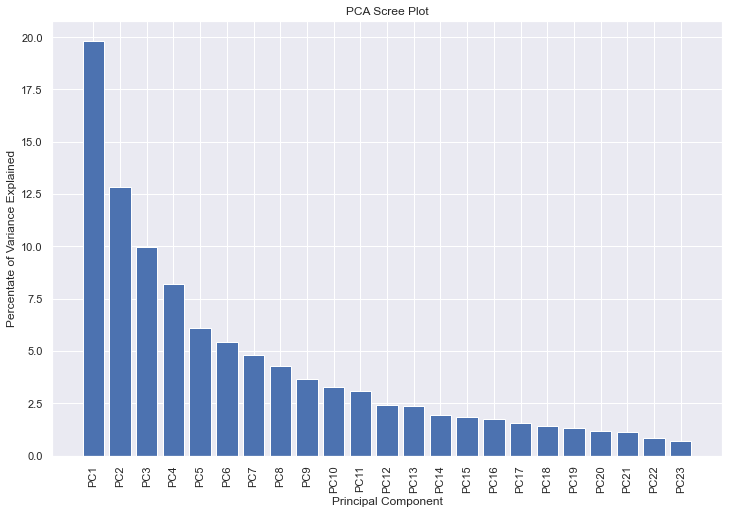

[19.79 12.85  9.96  8.2   6.09  5.45  4.79  4.3   3.64  3.27  3.1   2.43
  2.39  1.93  1.86  1.76  1.58  1.4   1.32  1.2   1.15  0.83  0.7 ]


In [26]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 
           'PC16','PC17', 'PC18', 'PC19', 'PC20','PC21', 'PC22', 'PC23']
plt.figure(figsize=(12, 8))
plt.bar(x= range(1,24), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(rotation=90)
plt.title('PCA Scree Plot')
plt.show()
print(percent_variance)

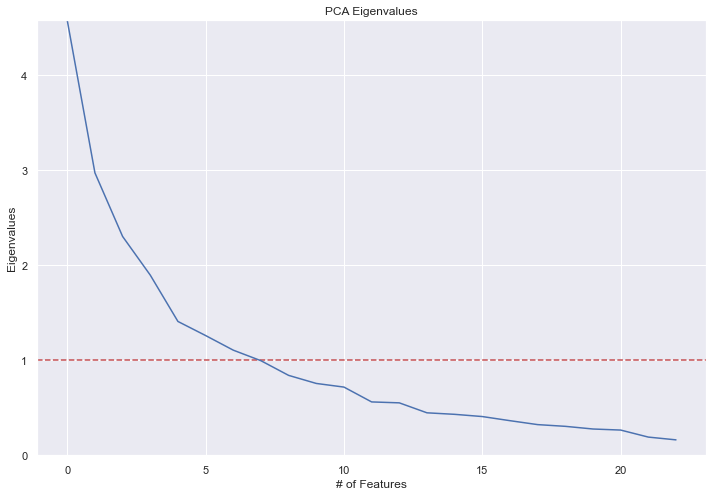

In [27]:
# scree plot
plt.figure(figsize=(12, 8))
plt.xlabel('# of Features')
plt.ylabel('Eigenvalues')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(pca.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(pca.explained_variance_)
plt.show()

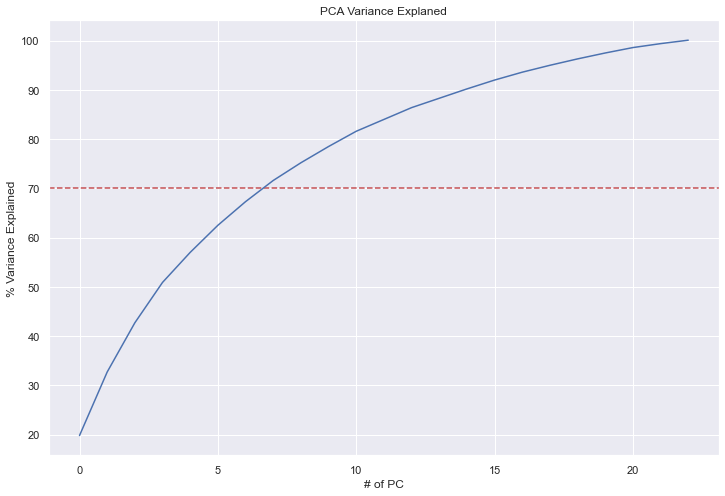

In [28]:
plt.figure(figsize=(12, 8))
plt.title('PCA Variance Explaned')
plt.xlabel('# of PC')
plt.ylabel('% Variance Explained')
plt.axhline(y=70, color='r', linestyle='--')

plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100))
plt.show()
#PCA1 is at 0 in xscale

To deal with a not-so-ideal scree plot curve, there are a couple ways:<br>

1) Kaiser rule: pick PCs with eigenvalues of at least 1. <br>
2) Proportion of variance plot: the selected PCs should be able to describe at least 80% of the variance.

In [29]:
pca = PCA(n_components= 8) #covariance matrix
pca.fit(x)
x_pca = pca.transform(x)
print(x_pca.shape)

(198, 8)


In [30]:
x_pca_df = pd.DataFrame(x_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
x_pca_df.head()
# this shows the covariance matrix and it shows that PC2 is positively related to PC1 and so on 

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.914937 -2.183683 -1.404810 -0.661934 -0.470670 -0.456795  0.150825   
1 -1.389544 -0.249122 -1.078508  0.577840  1.329421  0.792799  0.431566   
2 -0.362739 -1.279074  0.167170  0.708988  0.903097 -0.308877 -1.381228   
3  0.512981  0.163754  2.069588 -0.278795  0.679367 -1.039172 -0.056764   
4 -0.910267 -1.036667  3.233189  0.308672 -0.881635  0.406394  0.634207   

        PC8  
0  0.599513  
1 -1.720945  
2 -0.212950  
3 -0.195358  
4  0.568397

A scree plot displays how much variation each principal component captures from the data. The y axis is eigenvalues, which essentially stand for the amount of variation. Use a scree plot to select the principal components to keep. An ideal curve should be steep, then bends at an “elbow”  — this is your cutting-off point — and after that flattens out.<br>

PCs should at least describe 70% of the variance. Based on the figure PC 1-7 are enough to describe the data. (since 0 is PC1)

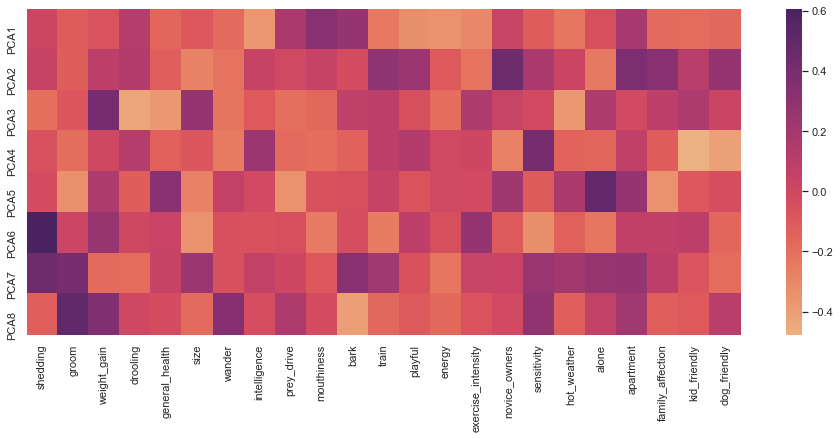

In [31]:
plt.figure(figsize=(16,6))
ax = sns.heatmap(pca.components_[0:8],
                 cmap="flare",
                 yticklabels=[ "PCA"+str(x) for x in range(1,9)],
                 xticklabels=list(dataset.columns))

In [32]:
components = pd.DataFrame(pca.components_, columns=x.columns)
components.rename(index= lambda x:'PC-' + str(x+1), inplace=True)

# Top 3 positive contributors
pd.DataFrame(components.columns.values[np.argsort(-components.values,axis=1)[:,:3]], 
             index=components.index, columns=['1st Max', '2nd Max','3rd Max'])

1st Max             2nd Max           3rd Max
PC-1     mouthiness                bark         apartment
PC-2  novice_owners           apartment  family_affection
PC-3    weight_gain                size      kid_friendly
PC-4    sensitivity        intelligence           playful
PC-5          alone      general_health         apartment
PC-6       shedding  exercise_intensity       weight_gain
PC-7       shedding               groom              bark
PC-8          groom         weight_gain            wander

In [33]:
# number of features = 26 
# number of samples = 158 
df = pd.DataFrame(dataset)
# compute the mean of each feature mean[0] == mean of shedding feature
mean = df.mean()
x_minus_mean = pd.DataFrame(df - mean).to_numpy()

In [34]:
print(x_minus_mean.shape)
# V1/PC1 : (x-mean)*V1/PC1 etc
print(pca.components_.T.shape)
pca.components_.shape

(198, 23)
(23, 8)


(8, 23)

In [35]:
pca.components_.shape


data = go.Scatter3d(
    x = x_pca[:,0],
    y = x_pca[:,1],
    z = x_pca[:,2],
    name = "",
    mode='markers',
    marker=dict(
        size=10,               
        opacity=0.8
)

)

dc_1 = go.Scatter3d( x = [0,np.matmul(x_minus_mean,pca.components_.T[:,:1])[0][0]],
                     y = [0,np.matmul(x_minus_mean,pca.components_.T[:,:1])[1][0]],
                     z = [0,np.matmul(x_minus_mean,pca.components_.T[:,:1])[2][0]],
                     marker = dict( size = 1,
                                    color ="red"),
                     line = dict( color = "red",
                                width = 10),
                     name = "PC1"
                     )
dc_2 = go.Scatter3d( x = [0,np.matmul(x_minus_mean,pca.components_.T[:,1:2])[0][0]],
                     y = [0,np.matmul(x_minus_mean,pca.components_.T[:,1:2])[1][0]],
                     z = [0,np.matmul(x_minus_mean,pca.components_.T[:,1:2])[2][0]],
                     marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                     line = dict( color = "green",
                                width = 10),
                     name = "PC2"
                     )
dc_3 = go.Scatter3d( x = [0,np.matmul(x_minus_mean,pca.components_.T[:,2:3])[0][0]],
                     y = [0,np.matmul(x_minus_mean,pca.components_.T[:,2:3])[1][0]],
                     z = [0,np.matmul(x_minus_mean,pca.components_.T[:,2:3])[2][0]],
                     marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                     line = dict( color = "blue",
                                width = 10),
                     name = "PC3"
                   ) 

data = [data,dc_1,dc_2,dc_3]
layout = go.Layout(
    xaxis=dict(
        titlefont=dict(
           family='Courier New, monospace',
           size=18,
           color='#7f7f7f'
       )
   )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [36]:
data = go.Scatter3d(
    x=x_pca[:,3],
    y = x_pca[:,4],
    z = x_pca[:,5],
    name = "data",
    mode='markers',
    marker=dict(
        size=10,               
        opacity=0.8
)

)

dc_1 = go.Scatter3d( x = [0,np.matmul(x_minus_mean,pca.components_.T[:,4:5])[0][0]],
                     y = [0,np.matmul(x_minus_mean,pca.components_.T[:,4:5])[1][0]],
                     z = [0,np.matmul(x_minus_mean,pca.components_.T[:,4:5])[2][0]],
                     marker = dict( size = 1,
                                    color = "rgb(84,48,5)"),
                     line = dict( color = "red",
                                width = 10),
                     name = "PC4"
                     )
dc_2 = go.Scatter3d( x = [0,np.matmul(x_minus_mean,pca.components_.T[:,5:6])[0][0]],
                     y = [0,np.matmul(x_minus_mean,pca.components_.T[:,5:6])[1][0]],
                     z = [0,np.matmul(x_minus_mean,pca.components_.T[:,5:6])[2][0]],
                     marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                     line = dict( color = "green",
                                width = 10),
                     name = "PC5"
                     )
dc_3 = go.Scatter3d( x = [0,np.matmul(x_minus_mean,pca.components_.T[:,6:7])[0][0]],
                     y = [0,np.matmul(x_minus_mean,pca.components_.T[:,6:7])[1][0]],
                     z = [0,np.matmul(x_minus_mean,pca.components_.T[:,6:7])[2][0]],
                     marker = dict( size = 1,
                                  color = "rgb(84,48,5)"),
                     line = dict( color = "blue",
                                width = 10),
                     name = "PC6"
                 ) 

data = [data,dc_1,dc_2,dc_3]
layout = go.Layout(
    xaxis=dict(
        title='PC1',
        titlefont=dict(
           family='Courier New, monospace',
           size=18,
           color='#7f7f7f'
       )
   )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [23] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


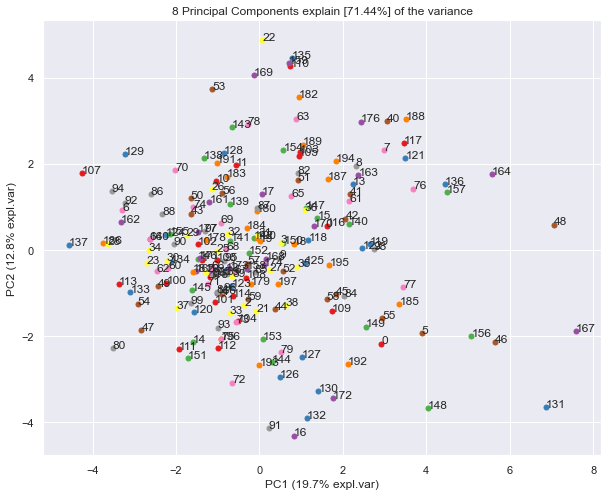

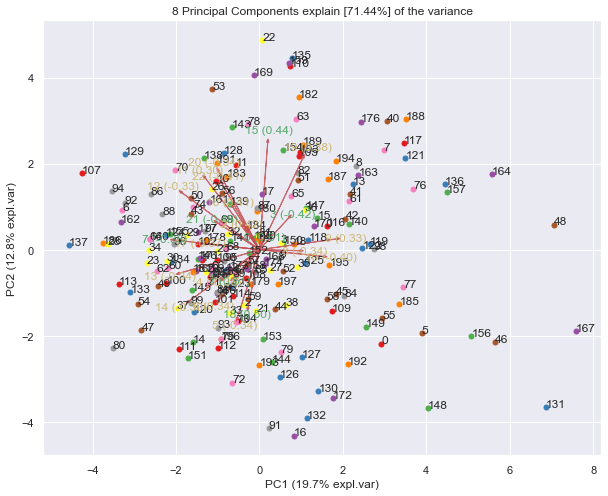

In [37]:
# reduce the data towards the PCs
model = pca_2(n_components=8)
# Fit transform
x.columns = pd.RangeIndex(x.columns.size)
x.columns  = x.columns.astype(str)
results = model.fit_transform(x)
# Plot explained variance
#fig, ax = model.plot()
fig, ax = model.scatter(legend=False)
# Make biplot with the number of features
fig, ax = model.biplot(n_feat=23, legend=False)

<b>Observations:</b>
- The 25 arrows dispersing out from the biplot diagram represents the 25 features in the 2 dimensional space. From the figure, there is a total of 156 points with each point representing the type of dog breed.

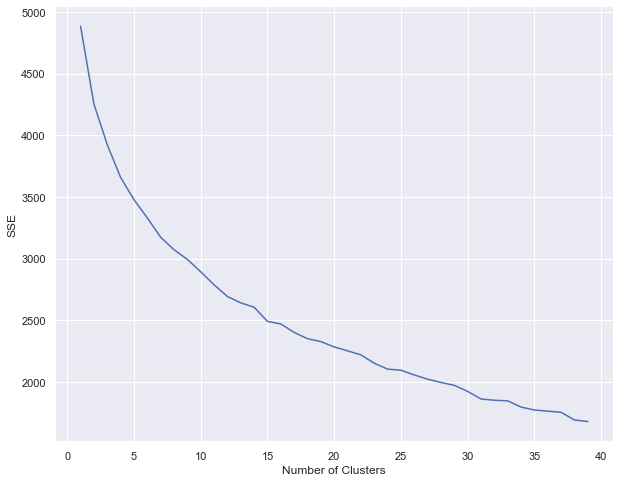

In [38]:
# Convert X_pca_2 into dataframe
pca_df = pd.DataFrame(x_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PC7', 'PC8'])
pca_df

# dis = distance.cdist(X_pca_2, X_pca_2, 'euclidean')
# print(dis)

# Make plot outputs appear and be stored within the notebook
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,8)

numClusters = range(1,40)
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(dataset)
    SSE.append(k_means.inertia_) # Sum of squared distances of samples to their closest cluster center

plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.plot(numClusters, SSE)

In [39]:
k_means = cluster.KMeans(n_clusters=13, max_iter=50, random_state=1)
k_means.fit(pca_df) 
to_cluster_pca_df = pca_df
labels = k_means.labels_
print('labels:', labels)
clusterID = pd.DataFrame(labels, columns=['Cluster ID'])
# to_cluster_pca_df['Cluster ID'] = labels
# sorted_pca_df = to_cluster_pca_df.sort_values(['Cluster ID'], ascending = True)
# sorted_pca_df
clusterID

labels: [12  3  3  9  9 12  7  0  2  0 10  8  3  2 11  2  6  8  0  1  1  3  2  7
  3  3 10 10  5  1  1 10 10 11  5 10 10  3  1  3  2  2  0  3  6 12 12  1
  4  1  5  8  9  2  5  9 10  3  9  1  7  8  1  2  5 10  1  3  3 10  5  5
 11  6 10 11  4 12  2  6  7  1  2  3  9  1  7  3  5  3  1 11  7  6  7 11
  1  3  9  3  7  1  3  8  1  8  1  7  1  0  2  5 11  5  3  1  9  8  0  9
  1  0  9  1  5  0 11  6 10  7  6  4  6  3  5  2  4  7  8 10  0 10  3  8
  6  1  1 10 12 12  0 11  3  6  2 10  4  4  9  2  5 10  5  0  4 11  1  4
 10  2  9  1  6  3  3  3  2 10  7  6  0  3  2 10  3  9  7  8  0  2  9  8
 12  6  2  0 11  9]


Cluster ID
0            12
1             3
2             3
3             9
4             9
..          ...
193           6
194           2
195           0
196          11
197           9

[198 rows x 1 columns]

In [40]:
# Centroids
centroids = k_means.cluster_centers_
centroids_df= pd.DataFrame(centroids,columns=pca_df.columns)
centroids_df

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6       PC7  \
0   1.716094  0.686953 -2.045733 -0.209570 -1.372072 -0.431777  1.333522   
1  -1.189571 -0.707077 -0.209723 -0.511372 -0.719797  0.183156 -0.267318   
2   1.079270  2.909432 -0.522611 -0.002600 -0.127680  0.902182 -0.181863   
3  -0.924085 -0.374423 -0.674888  0.691660  1.341554  0.898309  0.000862   
4   5.596981 -0.117956  0.835284  0.208819  1.151451 -0.423182 -0.547377   
5  -2.479147  0.001215  0.321050  2.230202 -0.677317 -0.982575  0.085061   
6   0.435271 -2.530291  0.375618  1.281119 -0.615848  0.274654 -0.068023   
7  -3.107078  0.412604  0.988955 -0.929539  1.079712 -0.797559  0.535909   
8   0.597486  1.960670  0.693066  0.995210  0.030663 -0.624454 -1.042331   
9   1.397466 -0.410755  3.353137 -0.551978 -0.620663  0.073322  0.619845   
10 -0.498281  0.787843 -0.067875 -1.221371  0.415833 -0.415597 -0.071014   
11 -0.834866 -2.137671 -0.921306 -1.692433 -0.750720  0.699244 -0.990144   
12  3.304825 -2.037771 -1.663799  0.000685  0.820298 -1.200142  0.378904   

         PC8  
0   0.144991  
1  -0.858830  
2  -0.153248  
3  -0.056999  
4  -0.331375  
5   0.427913  
6  -0.276221  
7   0.700841  
8   0.465484  
9   0.082152  
10 -0.361985  
11  1.195201  
12  0.346453

In [41]:
# Grouping original dataset via label
dataset_cluster = dataset.copy()
dataset_cluster['Cluster ID'] = labels
dataset_cluster.index = index_list
dataset_cluster = dataset_cluster.sort_values(['Cluster ID'], ascending = True)
dataset_cluster.columns

Index(['shedding', 'groom', 'weight_gain', 'drooling', 'general_health',
       'size', 'wander', 'intelligence', 'prey_drive', 'mouthiness', 'bark',
       'train', 'playful', 'energy', 'exercise_intensity', 'novice_owners',
       'sensitivity', 'hot_weather', 'alone', 'apartment', 'family_affection',
       'kid_friendly', 'dog_friendly', 'Cluster ID'],
      dtype='object')

In [42]:
# Create 13 cluster df
c0 = dataset_cluster.loc[dataset_cluster['Cluster ID'] == 0]
c1 = dataset_cluster.loc[dataset_cluster['Cluster ID'] == 1]
c2 = dataset_cluster.loc[dataset_cluster['Cluster ID'] == 2]
c3 = dataset_cluster.loc[dataset_cluster['Cluster ID'] == 3]
c4 = dataset_cluster.loc[dataset_cluster['Cluster ID'] == 4]
c5 = dataset_cluster.loc[dataset_cluster['Cluster ID'] == 5]
c6 = dataset_cluster.loc[dataset_cluster['Cluster ID'] == 6]
c7 = dataset_cluster.loc[dataset_cluster['Cluster ID'] == 7]
c8 = dataset_cluster.loc[dataset_cluster['Cluster ID'] == 8]
c9 = dataset_cluster.loc[dataset_cluster['Cluster ID'] == 9]
c10 = dataset_cluster.loc[dataset_cluster['Cluster ID'] == 10]
c11 = dataset_cluster.loc[dataset_cluster['Cluster ID'] == 11]
c12 = dataset_cluster.loc[dataset_cluster['Cluster ID'] == 12]

In [43]:
# Dropping Label before PCA
c0 = c0.drop(['Cluster ID'], axis = 1)
c1 = c1.drop(['Cluster ID'], axis = 1)
c2 = c2.drop(['Cluster ID'], axis = 1)
c3 = c3.drop(['Cluster ID'], axis = 1)
c4 = c4.drop(['Cluster ID'], axis = 1)
c5 = c5.drop(['Cluster ID'], axis = 1)
c6 = c6.drop(['Cluster ID'], axis = 1)
c7 = c7.drop(['Cluster ID'], axis = 1)
c8 = c8.drop(['Cluster ID'], axis = 1)
c9 = c9.drop(['Cluster ID'], axis = 1)
c10 = c10.drop(['Cluster ID'], axis = 1)
c11 = c11.drop(['Cluster ID'], axis = 1)
c12 = c12.drop(['Cluster ID'], axis = 1)

# Store clusters into an array
clus_arr = [c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12]

In [44]:
#printing cluster 0 dataframe
eg1=clus_arr[0].iloc[[0]]
print(eg1.values.tolist())
clus_arr[0]

[[3, 5, 3, 4, 2, 4, 4, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4, 4, 3, 3, 5, 3, 3]]


shedding  groom  weight_gain  drooling  general_health  \
Rhodesian Ridgeback         3      5            3         4               2   
Whippet                     4      5            1         5               3   
Bedlington Terrier          5      2            3         5               3   
Ibizan Hound                5      5            1         5               4   
Chinook                     2      3            3         5               3   
Xoloitzcuintli              5      5            3         5               5   
Scottish Deerhound          4      4            2         3               2   
Chihuahua                   4      5            3         5               2   
Italian Greyhound           4      5            1         5               2   
Canaan Dog                  3      3            2         5               4   
Toy Fox Terrier             4      5            2         4               2   
Chinese Crested             5      4            2         5               2   
Saluki                      4      4            1         5               4   
Greyhound                   3      5            2         5               3   

                     size  wander  intelligence  prey_drive  mouthiness  ...  \
Rhodesian Ridgeback     4       4             3           4           3  ...   
Whippet                 3       4             4           5           3  ...   
Bedlington Terrier      2       4             3           5           4  ...   
Ibizan Hound            3       4             3           5           3  ...   
Chinook                 4       1             4           4           4  ...   
Xoloitzcuintli          3       5             5           5           3  ...   
Scottish Deerhound      5       4             3           5           3  ...   
Chihuahua               1       2             3           5           4  ...   
Italian Greyhound       1       4             3           5           4  ...   
Canaan Dog              3       2             4           3           3  ...   
Toy Fox Terrier         1       4             4           5           2  ...   
Chinese Crested         1       1             3           3           4  ...   
Saluki                  4       5             3           5           4  ...   
Greyhound               4       4             3           5           4  ...   

                     energy  exercise_intensity  novice_owners  sensitivity  \
Rhodesian Ridgeback       3                   3              3            4   
Whippet                   4                   3              4            4   
Bedlington Terrier        3                   2              4            3   
Ibizan Hound              3                   3              3            3   
Chinook                   2                   4              3            4   
Xoloitzcuintli            3                   3              1            5   
Scottish Deerhound        3                   3              4            3   
Chihuahua                 3                   2              4            5   
Italian Greyhound         3                   1              4            4   
Canaan Dog                4                   3              3            4   
Toy Fox Terrier           3                   4              3            3   
Chinese Crested           2                   1              3            5   
Saluki                    4                   2              2            4   
Greyhound                 3                   2              4            3   

                     hot_weather  alone  apartment  family_affection  \
Rhodesian Ridgeback            4      3          3                 5   
Whippet                        4      2          3                 5   
Bedlington Terrier             3      3          4                 5   
Ibizan Hound                   4      2          3                 5   
Chinook                        4      3          4                 4   
Xoloitzcuintli  

In [45]:
#print cluster 9 data frame
eg2=clus_arr[9].iloc[[0]]
print(eg2.values.tolist())
clus_arr[9]

[[4, 5, 5, 2, 2, 5, 3, 4, 2, 1, 5, 4, 4, 2, 5, 3, 4, 2, 5, 5, 5, 4, 2]]


shedding  groom  weight_gain  drooling  \
Bullmastiff                        4      5            5         2   
Great Dane                         4      5            3         2   
Mastiff                            4      4            4         2   
Bernese Mountain Dog               1      2            4         1   
Basset Hound                       3      3            5         3   
Leonberger                         1      4            4         3   
Irish Wolfhound                    3      3            3         2   
Rottweiler                         3      5            5         2   
Saint Bernard                      3      3            4         1   
Great Pyrenees                     1      3            4         2   
Neapolitan Mastiff                 3      2            4         1   
Newfoundland                       1      1            4         1   
Bulldog                            4      2            5         1   
Clumber Spaniel                    2      2            4         2   
Greater Swiss Mountain Dog         3      5            4         2   

                            general_health  size  wander  intelligence  \
Bullmastiff                              2     5       3             4   
Great Dane                               1     5       2             3   
Mastiff                                  1     5       1             3   
Bernese Mountain Dog                     1     5       2             3   
Basset Hound                             1     4       5             2   
Leonberger                               1     5       2             3   
Irish Wolfhound                          1     5       3             3   
Rottweiler                               1     5       2             4   
Saint Bernard                            1     5       2             3   
Great Pyrenees                           2     5       4             3   
Neapolitan Mastiff                       1     5       1             3   
Newfoundland                             1     5       1             3   
Bulldog                                  1     3       1             2   
Clumber Spaniel                          2     4       3             4   
Greater Swiss Mountain Dog               3     5       3             3   

                            prey_drive  mouthiness  ...  energy  \
Bullmastiff                          2           1  ...       2   
Great Dane                           2           2  ...       3   
Mastiff                              2           3  ...       2   
Bernese Mountain Dog                 4           3  ...       2   
Basset Hound                         4           3  ...       2   
Leonberger                           4           3  ...       4   
Irish Wolfhound                      5           2  ...       2   
Rottweiler                           2           2  ...       3   
Saint Bernard                        3           2  ...       2   
Great Pyrenees                       4           3  ...       2   
Neapolitan Mastiff                   2           2  ...       2   
Newfoundland                         3           2  ...       3   
Bulldog                              2           2  ...       2   
Clumber Spaniel                      3           2  ...       3   
Greater Swiss Mountain Dog           4           3  ...       3   

                            exercise_intensity  novice_owners  sensitivity  \
Bullmastiff                                  5              3            4   
Great Dane                                   4              3            4   
Mastiff                                      3              2            3   
Bernese Mountain Dog                         4              4            3   
Basset Hound                                 3              4            2   
Leonberger                                   4              3            4   
Irish Wolfhound                              3              4            3   
Rottweiler               

Predict user input

In [46]:
print(dataset.columns)
#these are the feautures in the dataframe
# 'shedding', 'groom', 'weight_gain', 'drooling', 'general_health',
#        'size', 'wander', 'intelligence', 'prey_drive', 'mouthiness', 'bark',
#        'train', 'playful', 'energy', 'exercise_intensity', 'novice_owners',
#        'sensitivity', 'hot_weather', 'alone', 'apartment', 'family_affection',
#        'kid_friendly', 'dog_friendly'

list_of_qn=["1. I do not mind a dog that sheds its fur often: ",
            "2. I prefer a dog that is easy to groom: ",
            "3. I do not mind a dog that can gain weight easily: ",
            "4. I do not mind my dog drooling: ",
            "5. A dog that is resistant to illnesses is important: ",
            "6. I prefer a big dog: ",
            "7. I prefer an intelligent dog bred for jobs that require decision: ",
            "8. I prefer a dog that wanders around on it's own: ",
            "9. I prefer a dog that chases and hunts for small prey: ",
            "10. I do not mind a dog that likes chewing on things: ",
            "11. I prefer a dog that barks: ",
            "12. I want a dog that is easy to train: ",
            "13. I prefer a playful dog: ",
            "14. I prefer a dog with high energy and stamina: ",
            "15. I like taking my dog out for walks: ",
            "16. I have little to no experience raising dogs: ",
            "17. My home is generally quiet without loud sounds or distractions: ",
            "18. I would like to bring my dog out and excercise on a hot sunny day: ",
            "19. I prefer a dog that is able to be by itself and not crave attention: ",
            "20. I prefer my dog to be calm indoors and polite with strangers: ",
            "21. I prefer a dog that is affectionate with my family members: ",
            "22. The dog has to be friendly with small kids & children: ",
            "23. I would like my dog to be friendly and not dominate other dogs: "
         ]

Index(['shedding', 'groom', 'weight_gain', 'drooling', 'general_health',
       'size', 'wander', 'intelligence', 'prey_drive', 'mouthiness', 'bark',
       'train', 'playful', 'energy', 'exercise_intensity', 'novice_owners',
       'sensitivity', 'hot_weather', 'alone', 'apartment', 'family_affection',
       'kid_friendly', 'dog_friendly'],
      dtype='object')


In [49]:
#check if user input is valid
def input_is_valid(user_input):
    try:
        test = int(user_input)
        if test > 0 and test <= 5:
            return True
        else:
            print("Input not valid, enter input again.")
            return False  
    except:
        print("Input not valid, enter input again.")
        return False
    
print("Hi, I will be recommending 5 dog breeds to you today.")
print("For each question, enter a number from 1 to 5.")
print("1 = Strongly disagree. 5 = Strongly agree.")

list_of_user_input=[]

for n in range(len(list_of_qn)):
    next_qns = False
    while next_qns == False:
        user_in = input(list_of_qn[n])
        user_in = int(user_in)
        if input_is_valid(user_in):
            list_of_user_input.append(int(user_in))
            next_qns = True
            
print("Inputs:", list_of_user_input)

user_input = np.array(list_of_user_input).reshape(-1, 1)
user_input = preprocessing.scale(user_input)
user_input = user_input.reshape(1, -1)

# Fit and transform user inputs
pca = PCA(n_components= 8)
pca.fit(pca_fitting_dataset)
user_pca = pca.transform(user_input)

k_means.fit(pca_df) 
ans = k_means.predict(user_pca)
ans = ans[0]
chosen_cluster = clus_arr[ans]

newDF = pd.DataFrame() #creates a new dataframe that's empty
newDF = newDF.append(chosen_cluster, ignore_index = False) #chosen cluster is Cluster 
recommendation_list = [] #to print the results from cosine formula 

for i,row in newDF.iterrows():
    #gets the result from the dataframe without header and index 
    #loc is used to return the result from each row of the dataset using label
    #row.name is to get the label of each row from the dataset
    i_Values = newDF.loc[row.name].values 
    #returns dot product of two arraws - list_of_ans and 
    dot_Result = dot(list_of_user_input,i_Values)
    cos_sim = dot_Result / (norm(list_of_user_input)*norm(i_Values))
    result = (row.name,cos_sim)
    recommendation_list.append(result)
    
recommendation_list.sort(key=lambda x:x[1])
#print(recommendation_list[:5])

labels = ['Breed', 'Cosine Similarity']
result_df = DataFrame(recommendation_list[:5],columns=['Breed', 'Cosine Similarity'])
print("According to your desired dog features, Top 5 Breeds to consider are as follows: \n",result_df['Breed'].to_string(index=False))


Hi, I will be recommending 5 dog breeds to you today.
For each question, enter a number from 1 to 5.
1 = Strongly disagree. 5 = Strongly agree.
1. I do not mind a dog that sheds its fur often: 3
2. I prefer a dog that is easy to groom: 5
3. I do not mind a dog that can gain weight easily: 3
4. I do not mind my dog drooling: 4
5. A dog that is resistant to illnesses is important: 2
6. I prefer a big dog: 4
7. I prefer an intelligent dog bred for jobs that require decision: 4
8. I prefer a dog that wanders around on it's own: 3
9. I prefer a dog that chases and hunts for small prey: 4
10. I do not mind a dog that likes chewing on things: 3
11. I prefer a dog that barks: 3
12. I want a dog that is easy to train: 4
13. I prefer a playful dog: 4
14. I prefer a dog with high energy and stamina: 3
15. I like taking my dog out for walks: 3
16. I have little to no experience raising dogs: 3
17. My home is generally quiet without loud sounds or distractions: 4
18. I would like to bring my dog ou

## Case 1 input: 
3, 5, 3, 4, 2, 4, 4, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4, 4, 3, 3, 5, 3, 3
This is a dog breed features from cluster 0

#### Case 2 input: 
4, 5, 5, 2, 2, 5, 3, 4, 2, 1, 5, 4, 4, 2, 5, 3, 4, 2, 5, 5, 5, 4, 2]
This is a one dog breed feature from cluster 9


In [50]:
print("The user input falls into cluster:",ans)
chosen_cluster

The user input falls into cluster: 0


shedding  groom  weight_gain  drooling  general_health  \
Rhodesian Ridgeback         3      5            3         4               2   
Whippet                     4      5            1         5               3   
Bedlington Terrier          5      2            3         5               3   
Ibizan Hound                5      5            1         5               4   
Chinook                     2      3            3         5               3   
Xoloitzcuintli              5      5            3         5               5   
Scottish Deerhound          4      4            2         3               2   
Chihuahua                   4      5            3         5               2   
Italian Greyhound           4      5            1         5               2   
Canaan Dog                  3      3            2         5               4   
Toy Fox Terrier             4      5            2         4               2   
Chinese Crested             5      4            2         5               2   
Saluki                      4      4            1         5               4   
Greyhound                   3      5            2         5               3   

                     size  wander  intelligence  prey_drive  mouthiness  ...  \
Rhodesian Ridgeback     4       4             3           4           3  ...   
Whippet                 3       4             4           5           3  ...   
Bedlington Terrier      2       4             3           5           4  ...   
Ibizan Hound            3       4             3           5           3  ...   
Chinook                 4       1             4           4           4  ...   
Xoloitzcuintli          3       5             5           5           3  ...   
Scottish Deerhound      5       4             3           5           3  ...   
Chihuahua               1       2             3           5           4  ...   
Italian Greyhound       1       4             3           5           4  ...   
Canaan Dog              3       2             4           3           3  ...   
Toy Fox Terrier         1       4             4           5           2  ...   
Chinese Crested         1       1             3           3           4  ...   
Saluki                  4       5             3           5           4  ...   
Greyhound               4       4             3           5           4  ...   

                     energy  exercise_intensity  novice_owners  sensitivity  \
Rhodesian Ridgeback       3                   3              3            4   
Whippet                   4                   3              4            4   
Bedlington Terrier        3                   2              4            3   
Ibizan Hound              3                   3              3            3   
Chinook                   2                   4              3            4   
Xoloitzcuintli            3                   3              1            5   
Scottish Deerhound        3                   3              4            3   
Chihuahua                 3                   2              4            5   
Italian Greyhound         3                   1              4            4   
Canaan Dog                4                   3              3            4   
Toy Fox Terrier           3                   4              3            3   
Chinese Crested           2                   1              3            5   
Saluki                    4                   2              2            4   
Greyhound                 3                   2              4            3   

                     hot_weather  alone  apartment  family_affection  \
Rhodesian Ridgeback            4      3          3                 5   
Whippet                        4      2          3                 5   
Bedlington Terrier             3      3          4                 5   
Ibizan Hound                   4      2          3                 5   
Chinook                        4      3          4                 4   
Xoloitzcuintli  

### 